# 数据导入

In [1]:
import pandas as pd
import numpy as np

In [2]:
road = 'D:/ori-learn/机器学习/handson-ml2-master/datasets/housing/housing.csv'

In [3]:
housing = pd.read_csv(road)

In [4]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


# 观测大局

In [5]:
housing.info()    # 看缺失值，和看所有列

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()    # 看单独一列内部结构

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()    # 描述性统计

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 数据分布

In [8]:
import matplotlib.pyplot as plt 
#plt.rcParams['font.sans-serif'] = ['Simhei']    # 需要中文时候加

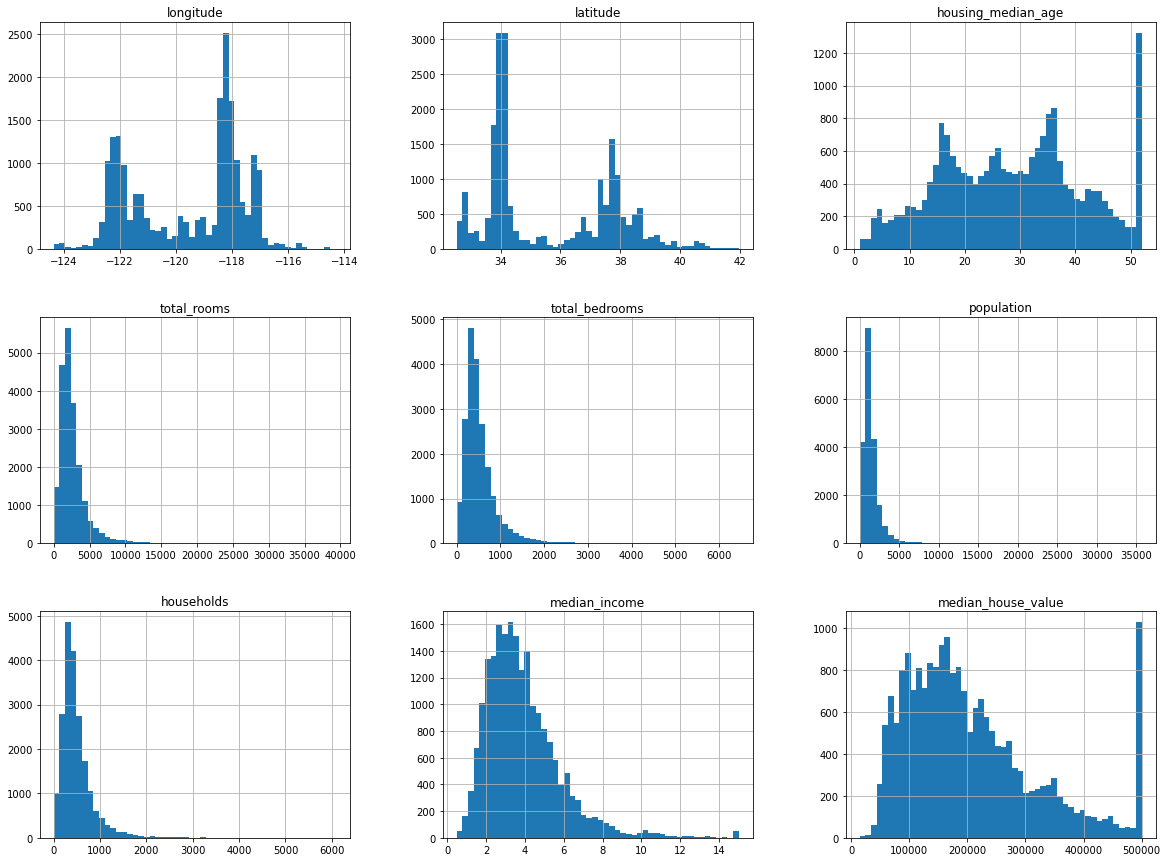

In [9]:
housing.hist(bins=50    # 分箱个数
             ,figsize=(20,15)    # 可视化大小
             #,range=(0,100)    # 设置上限和下限
             #,cumulative=True    # 是否计算累计
             #,orientation='vertical'    # 水平和垂直
             #,alpha=0.8    # 透明度
             #,histtype='step'    # 柱子颜色填充
             #,edgecolor='#FFD700'    # 描边颜色
             #,color='red'    # 整体颜色
            )    # hist是直方图，看看数据整体分布
plt.show()

## 训练数据划分

In [10]:
from sklearn.model_selection import train_test_split    # 划分训练集和测试集

In [11]:
x_train,x_test = train_test_split(housing,test_size=0.2,random_state=42)    # 测试集数据量为20%,random_state用于固定测试数据

## 数据分箱（可提高准确性）

In [12]:
housing['income_cat'] = pd.cut(housing['median_income']
                               ,bins = [0,1.5,3,4.5,6,np.inf]    # np.inf意思为正无穷
                               ,labels= [1,2,3,4,5]
                              )    # 降维，数值型数据降成分类数据

<AxesSubplot:>

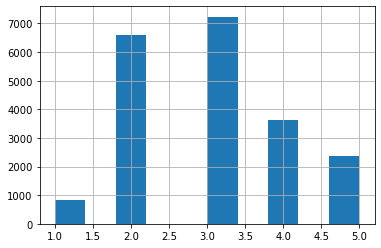

In [13]:
housing['income_cat'].hist()    # 列可视化

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit    # 用于分层的类

In [15]:
split = StratifiedShuffleSplit(n_splits=1    # 拆分迭代次数
                              ,test_size=0.2    # 测试集占比
                              ,random_state=42    # 控制随机性
                              )

## 看看划分的合理不合理

In [16]:
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[train_index]

In [17]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)    # 测试集各个分组占比

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

# 探索数据

In [18]:
housing = strat_train_set.copy()    # 为了不影响训练集数据，创建一个副本

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

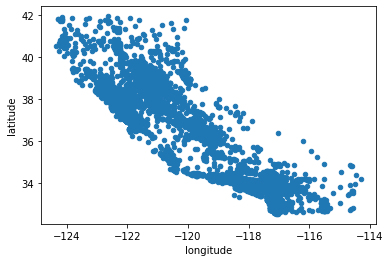

In [19]:
housing.plot(kind='scatter',x='longitude',y='latitude')    # 新手上路，kind=图表类型

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

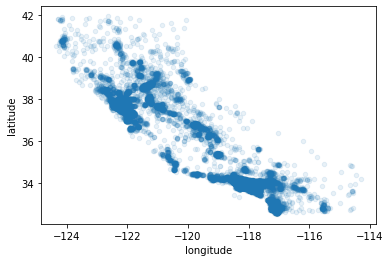

In [20]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)
# 添加透明度,alpha=透明度，可以分辨密度高的地方

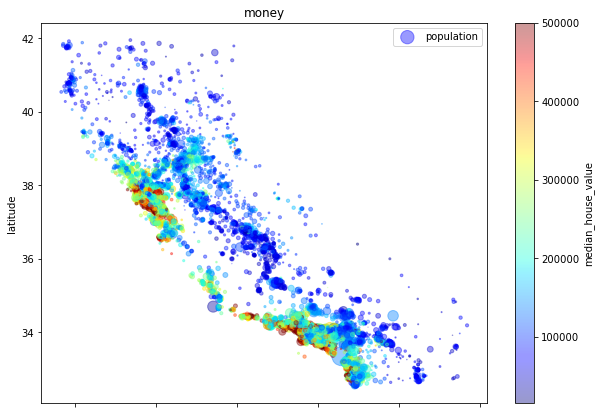

In [21]:
housing.plot(kind='scatter'    # 图表类型
            ,x='longitude',y='latitude'    # XY轴
            ,s=housing['population'] / 100    # 散点的大小
            ,c='median_house_value'    # 按照col决定颜色深浅
            ,label='population'    # 图表标签名字
            ,alpha=0.4    # 透明度
            ,figsize=(10,7)    # 图标宽、高
            ,cmap = plt.get_cmap('jet')    # 选择色彩映射
            ,colorbar = True    # 添加颜色标尺，默认为True
            ,title='money'    # 标题
            )
plt.legend()    # 添加图例

## 相关性分析

In [22]:
corr_matrix = housing.corr(method='pearson')    # 默认皮尔逊相关系数，非正态数值型用spearman,分类数据用kendall
corr_matrix.sort_values(by='median_house_value',axis=0,ascending=False)    # 可以按目标属性降序

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673


In [23]:
from pandas .plotting import scatter_matrix    # 相关系数可视化，并绘制数据分布图

In [24]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']    # 选几列

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

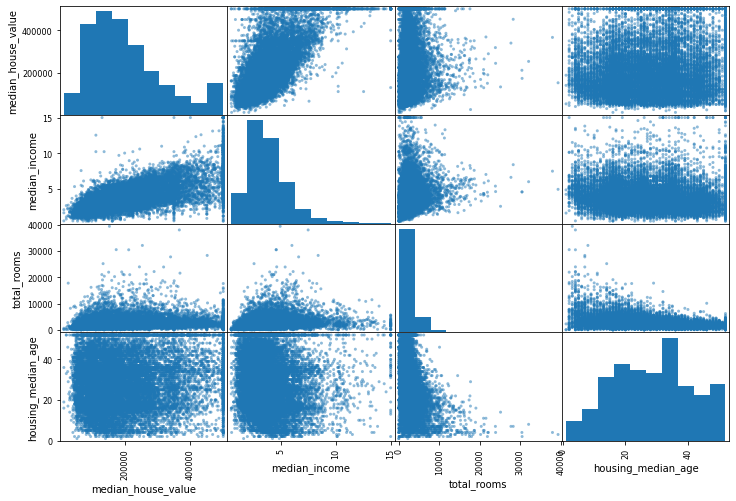

In [25]:
scatter_matrix(housing[attributes],figsize=(12,8))    # scatter_matrix可以可视化所有列，但是不方便阅读

# 数据清洗

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

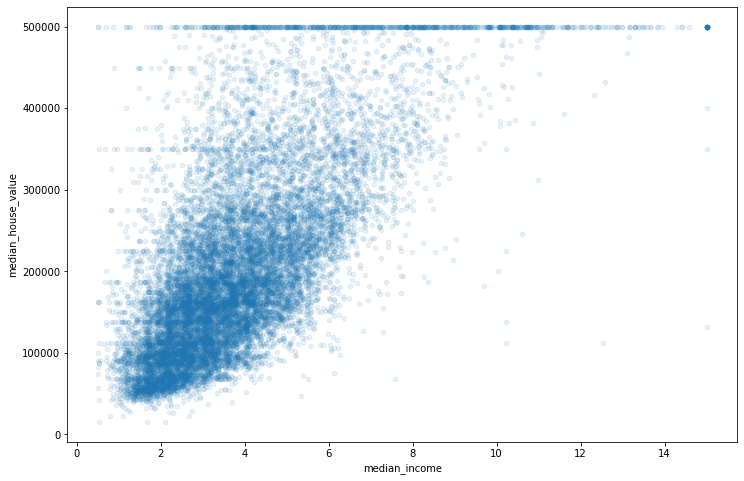

In [26]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,figsize=(12,8))

In [27]:
housing = strat_train_set.drop('median_house_value',axis=1)    # 将目标属性分离
housing_labers = strat_train_set['median_house_value'].copy()    # 目标属性赋值

## 缺失值的处理
1. 删除有缺失值的区域
2. 删除有缺失值的整列
3. 用中位数填充缺失值

### 方法1 用pandas

In [28]:
#housing.dropna(subset=['total_bedrooms'])    # 删除有缺失值的区域
#housing.drop('total_bedrooms',axis=1)    # 删除有缺失值的整列
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace=True)    # 用中位数填充缺失值

### 方法2 用sklearn的SimpleImputer

In [29]:
from sklearn.impute import SimpleImputer    # 只能用于数值型数据，有分类型数据需要删除

In [30]:
housing_num = housing.drop('ocean_proximity',axis=1)    # 删除列

In [31]:
imputer = SimpleImputer(strategy='median')    # 仅限于数值型数据

In [32]:
imputer.fit(housing_num)    # 将实列属性匹配到训练集中

SimpleImputer(strategy='median')

In [50]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [51]:
housing_num.median().values

C:\Users\HCKJ\AppData\Local\Temp\ipykernel_13936\3605723347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [35]:
X = imputer.transform(housing_num)    # 清洗结果，完美的数据

In [36]:
X

array([[-121.46  ,   38.52  ,   29.    , ...,  706.    ,    2.1736,
           2.    ],
       [-117.23  ,   33.09  ,    7.    , ...,  768.    ,    6.3373,
           5.    ],
       [-119.04  ,   35.37  ,   44.    , ...,  300.    ,    2.875 ,
           2.    ],
       ...,
       [-122.72  ,   38.44  ,   48.    , ...,  172.    ,    3.1797,
           3.    ],
       [-122.7   ,   38.31  ,   14.    , ...,  501.    ,    4.1964,
           3.    ],
       [-122.14  ,   39.97  ,   27.    , ...,  197.    ,    3.1319,
           3.    ]])

## array转df

In [52]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns
                         ,index = housing_num.index
                         )
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0


## 处理文本和分类属性

In [56]:
housing_cat = housing[['ocean_proximity']]    # 中括号两个会变df,一个的话是array
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [55]:
housing_cat = housing['ocean_proximity']    # 中括号两个会变df,一个的话是array
housing_cat.head()

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
Name: ocean_proximity, dtype: object

### 顺序编码 

In [38]:
from sklearn.preprocessing import OrdinalEncoder    # 文本转数字,序号编译器

In [39]:
ordinal_encoder = OrdinalEncoder()

In [40]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:5]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.]])

In [41]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 独热编码

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
cat_encoder = OneHotEncoder()

In [44]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [45]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [46]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 自定义转换器

## 特征缩放

归一化MinMaxScaler：容易受到极值影响，但是类似神经网络需要归一处理\
标准化StandadScaler：不受极值影响，但特定情况下无法使用

## 转换流水线

# 选择和训练模型

## 性能指标
**均方根误差(RMSE)**
>$RMSE(X,h)=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(X^{(i)})-y^{(i)})^2}$
***
**平均误差，又称为曼哈顿距离**
>$MAE(X,h)=\frac{1}{m}\sum_{i=1}^{m}|h(X^{(i)})-y^{(i)}|$
***
**包含n个元素的向量Vk的范数可以定义为：**
>$||V||_k=(|v_0|^k+|v_1|^k+....+|v_n|^k)^{\frac{1}{k}}$

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
tree_reg = DecisionTreeRegressor()

# 微调模型

# 展示解决方案

# 启动、监控和维护